2002_07_22_big_img_725 not found...
2002_08_17_big_img_434 not found...
2002_08_21_big_img_265 not found...
2002_08_14_big_img_726 not found...
2002_08_02_big_img_198 not found...
2003_01_01_big_img_176 not found...
2002_08_26_big_img_313 not found...
2002_08_06_big_img_2288 not found...
2002_08_19_big_img_588 not found...
2002_08_24_big_img_398 not found...
2002_08_09_big_img_525 not found...
2002_08_19_big_img_373 not found...
2002_07_31_big_img_249 not found...
2002_08_25_big_img_150 not found...
2002_07_20_big_img_318 not found...
2002_08_12_big_img_594 not found...
2003_01_13_big_img_728 not found...
2002_08_19_big_img_325 not found...


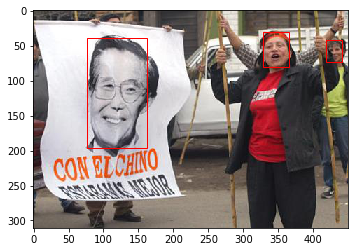

{'name': '2002_07_24_big_img_402.jpg', 'annotations': '328 30 38 51,77 39 85 157,418 42 23 32,', 'size': {'width': 450, 'height': 311}}


In [6]:
import glob
import math
import pandas as pd
import re
import numpy as np
import os #soluciona problemas del sistema operativo
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
import shutil

    

def pdToXml(name, coordinates, size, img_folder):
    xml = ['<annotation>']
    xml.append("    <folder>{}</folder>".format(img_folder))
    xml.append("    <filename>{}</filename>".format(name))
    xml.append("    <source>")
    xml.append("        <database>Unknown</database>")
    xml.append("    </source>")
    xml.append("    <size>")
    xml.append("        <width>{}</width>".format(size["width"]))
    xml.append("        <height>{}</height>".format(size["height"]))
    xml.append("        <depth>3</depth>".format())
    xml.append("    </size>")
    xml.append("    <segmented>0</segmented>")

    z = 0
    
    while z < len(coordinates):
        x = ""
        while coordinates[z] != ' ':
            x+=coordinates[z]
            z+=1
        x = int(x)
        z +=1
        y = ""
        while coordinates[z]!=' ':
            y+=coordinates[z]
            z+=1
        y = int(y)
        z +=1
        w = ""
        while coordinates[z]!=' ':
            w+=coordinates[z]
            z+=1
        w = int(w)
        z +=1
        h = ""
        while coordinates[z]!=',':
            h+=coordinates[z]
            z+=1
        h = int(h)
        z+=1
        xmin = x
        ymin = y
        xmax = x+w
        ymax = y+h

        xml.append("    <object>")
        xml.append("        <name>Face</name>")
        xml.append("        <pose>Unspecified</pose>")
        xml.append("        <truncated>0</truncated>")
        xml.append("        <difficult>0</difficult>")
        xml.append("        <bndbox>")
        xml.append("            <xmin>{}</xmin>".format(int(xmin)))
        xml.append("            <ymin>{}</ymin>".format(int(ymin)))
        xml.append("            <xmax>{}</xmax>".format(int(xmax)))
        xml.append("            <ymax>{}</ymax>".format(int(ymax)))
        xml.append("        </bndbox>")
        xml.append("    </object>")
    xml.append('</annotation>')
    return '\n'.join(xml)


  

  #Función que te regresa un arreglo con los nombres de los archivos
def generateArray(file):
    with open(file,"r") as f:
        return  f.read().splitlines()

def display(Diccionarios,n):
    name = Diccionarios[n]['name']
    img = mpimg.imread(os.path.join("dataset/"+name))
    fig,ax = plt.subplots(1)
    ax.imshow(img)               
    ann = Diccionarios[n]['annotations']
    z = 0
    while z < len(ann):
        x = ""
        while ann[z] != ' ':
            x+=ann[z]
            z+=1
        x = int(x)
        z +=1
        y = ""
        while ann[z]!=' ':
            y+=ann[z]
            z+=1
        y = int(y)
        z +=1
        w = ""
        while ann[z]!=' ':
            w+=ann[z]
            z+=1
        w = int(w)
        z +=1
        h = ""
        while ann[z]!=',':
            h+=ann[z]
            z+=1
        h = int(h)
        
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        z += 1
        
    (h, w, _) = img.shape
    plt.show()
    
def transformCoordinates(coordinates,wmax,hmax):
    #major_axis_radius, minor_axis_radius, angle, center_x, center_y, detection_score
    max_ax = ""
    x = 0
    
     #Recupera el axis mayor
    while coordinates[x] != ' ':
        max_ax += coordinates[x]
        x += 1
    max_ax = float(max_ax)
    x += 1
    
    #Recuperas el axis menor
    min_ax = ""
    while coordinates[x] != ' ':
        min_ax += coordinates[x]
        x += 1
    min_ax = float(min_ax)
    x += 1
    
    #Recuperas el ángulo
    angle = ""
    while coordinates[x] != ' ':
        angle += coordinates[x]
        x += 1
    angle = float(angle)
    x += 1
    
    #Recuperas el centro (coordenada x)
    center_x = ""
    while coordinates[x] != ' ':
        center_x += coordinates[x]
        x += 1
    center_x = float(center_x)
    x += 1
    
    #Recuperas el centro (coordenada y)
    center_y = ""
    while coordinates[x] != ' ':
        center_y += coordinates[x]
        x += 1
    center_y = float(center_y)
    
    a = ((math.cos(angle)**2)*(max_ax**2))+((math.sin(angle)**2)*(min_ax**2))
    b = ((math.sin(angle)**2)*(max_ax**2))+((math.cos(angle)**2)*(min_ax**2))
    w = 2*math.sqrt(a)
    h = 2*math.sqrt(b)
    center_x -= w/2
    center_y -= h/2
    #w = 2*math.cos(angle)*max_ax 
    #h = 2*math.sin(angle)*max_ax 
    #Si se sale del borde de la imagen
    if (center_x + w) > wmax: #si el radio de la figura + x es mayor al borde de la imagen (se sale), mueve el centro
        w = w - (center_x + w - wmax)
    elif center_x < 0:
        w = (center_x) + w
        center_x = 1
        
    if (center_y + h ) > hmax:
         h = (h -(center_y+h-hmax))
    elif center_y < 0:
        h = h-center_y
        center_y = 1
    #Se redondea a enteros (debido a que no hay pixeles a la mitad) 
    h = int(h)
    w = int(w)
    center_y = int(center_y)
    center_x = int(center_x)
    
    return str(center_x)+' '+str(center_y)+' '+str(w)+' '+str(h)

#Guarda el path del dataset con las imágenes
folder = pd.Series(glob.glob("dataset/*.jpg"))
folder
#Guardas el path de las etiquetas que contienen la info de cada imagen (coordenadas,etc)
labels = pd.Series(glob.glob("labels/*-ellipselist.txt"))
labels
i = 0
j = 0
a = 0
#Arreglo que almacenará todos los diccionarios de un archivo
arrDiccionarios = list()
while a < len(labels):
    string = labels[a]
    arr = generateArray(string)
    i = 0
    while i <len(arr):
      #Busca las imagenes que tengan ese formato
        x = re.search("(\d)*_(\d)*_(\d)*_big_img_(\d)*", arr[i])
        if x:
            try:
               #Construyes el diccionario
                name = arr[i]+".jpg"
                # mathplotlib
                #os.path.join te crea el path para TU sistema operativo. Esto ahorra errores de compatibilidad
                img = mpimg.imread(os.path.join("dataset",name)) #abre la imagen como si fuera un file
                (h,w, _) = img.shape
                annotations = ""
                k = 0
                while k < int(arr[i+1]):
                    datos = arr[2+i+k]
                    datos = transformCoordinates(datos,w,h)
                    annotations = annotations + datos +','
                    k += 1
                medidas = {
                    'width' : w,
                    'height' : h
                }   
                dicc = {
                    'name' : name, #nombre de la imagen
                    'annotations' : annotations, #coordenadas donde se encontraron los elipse
                    'size' : medidas
                }
                 #Agregas el diccionario al arreglo de diccionarios

                st = pdToXml(dicc['name'], dicc['annotations'], dicc['size'], "dataset")
                nameXML = dicc['name'].replace(".jpg",".xml")
                file = open(os.path.join("dataset_clean",nameXML),'w')
                file.write(str(st))
                file.close()
                
                shutil.copy("dataset/"+name,"dataset_clean")
                arrDiccionarios.append(dicc)
            except:
                print("{} not found...".format(arr[i]))
        i = i + 1
    
    a = a + 1    
Diccionarios = pd.Series(arrDiccionarios)
n = 6
display(Diccionarios,n)
